In [362]:
from bs4 import BeautifulSoup
import urllib
import urllib.request as ur
import pandas as pd
from datetime import datetime
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import nltk
from urllib.request import Request, urlopen
import random
import matplotlib.pyplot as plt


In [363]:
df = pd.read_csv ('Online Gambling Sites.csv')

# clean the data
del df[df.columns[0]]
df = df.drop(['Crypto Currencies', 'Community','~AutoDice speed (~10 sec)'], axis=1)
df = df.replace('?',0).dropna()

In [364]:
# clean global rank and sort

df = df.loc[df['Global Rank'] != '-']
df['Global Rank'] = df['Global Rank'].astype(int) 
df = df.loc[df['Global Rank'] < 10000].sort_values(by=['Global Rank'])

# clean misdecoded numbers and convert strings to ints
df[df.columns[5:17]] = df[df.columns[5:17]].replace({"\xa0":"", " ": ""}, regex=True).astype(int)

# set companyname asindex
# haha = df['Link'].str.split('.')[0]
df['Company'] = df['Link'].str.split('.').str[0]
df = df.drop('Link', axis=1).set_index('Company')

In [368]:
df['Global Rank']

Company
bet365            114
pch               195
caliente          408
verajohn          756
nesine            867
netkeiba          936
parimatch        1216
hollywoodbets    1560
freebitco        1959
stoloto          2208
betfair          2258
fdj              2343
tjk              2646
bovada           2759
skybet           3310
williamhill      3345
lotto            3531
lapalingo        8248
skyvegas         8391
planetwin365     9417
playamo          9901
Name: Global Rank, dtype: int64

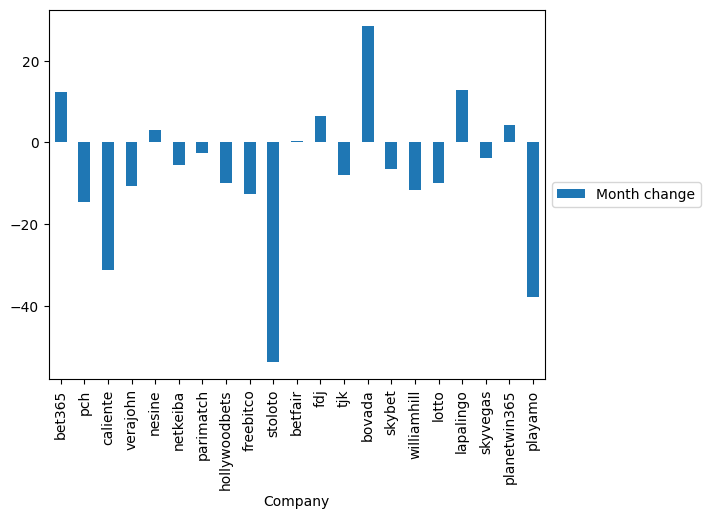

In [365]:
# plot month change 
df_mc = df[df.columns[-1]].replace({",":".", "%": ""}, regex=True).astype(float).T
df_mc.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

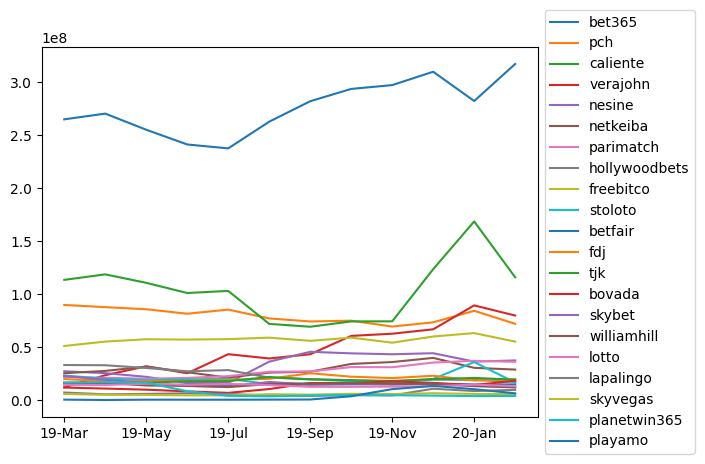

In [366]:
# plot volume trends
df_vt = df.drop(df.columns[0:4], axis = 1).drop(df.columns[-1], axis = 1).T

df_vt.plot.line()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [367]:
# Calculate corelation between global rank and volume

# clean
df_rv = df.drop(df.columns[0:3], axis = 1).drop(df.columns[-1], axis = 1)
df_rv['Mean'] = df_rv[df_rv.columns[1:-1]].mean(axis=1).astype(float)
df_rv = df_rv.drop(df_rv.columns[1:-1], axis = 1)

# calculate
cor = df_rv['Global Rank'].corr(df_rv['Mean']).astype(str)
print('The corelation between Global Rank and Mean of website visit is '+ cor )

The corelation between Global Rank and Mean of website visit is -0.46111983519583766
